In [25]:
import numpy as np
import matplotlib.pyplot as plt

from rcsj_sde.junction import JosephsonJunction
from rcsj_sde.shapiro import run_shapiro

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Junction and simulation parameters

In [26]:
Ic = 5.7e-07
R = 9
C = 8.8e-12
T = 0.25

F_ac = 2e9

I_min = 0  # simulation start
I_max = 5.5*Ic  # simulation end

I_points = 100  # number of current values in the range
I_DC_range = np.linspace(I_min, I_max, I_points)  # ramp up only

tau_max = 4_000
tau_points = 40_000

power_points = 51
powers = np.linspace(-110, -60, power_points)  # power values in dBm

## Investigating different CPR compositions

Run simulations for different $a, b$ parameters.

In [27]:
bvals = [0.1, 0.2, 0.5]
experiments = []

for b in bvals:
    a = 1 - b
    jj = JosephsonJunction(Ic=Ic, a=a, b=b, R=R, C=C, T=T)
    dVdI, V = run_shapiro(jj, I_DC_range, F_ac, tau_max, tau_points, powers)
    experiments.append((dVdI, V))

100%|██████████| 51/51 [00:55<00:00,  1.09s/it]


Plot results.

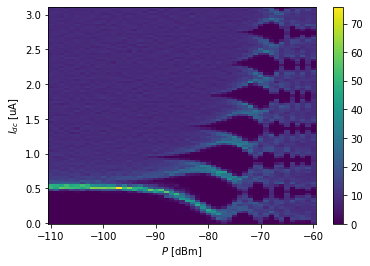

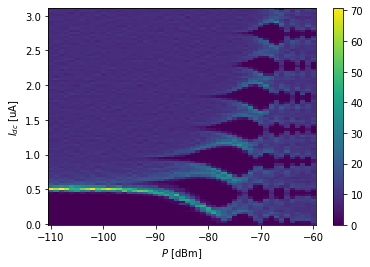

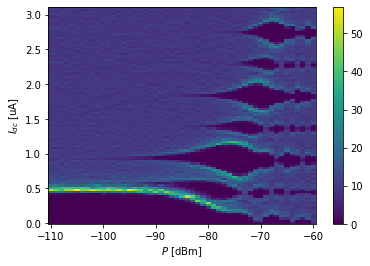

In [28]:
for b, exp in zip(bvals, experiments):
    dVdI, V = exp
    
    plt.figure()
    plt.pcolormesh(powers, I_DC_range[:-1]/1e-6, dVdI.T, vmin=0, rasterized=True, shading="auto")
    plt.xlabel(r"$P$ [dBm]")
    plt.ylabel(r"$I_{dc}$ [uA]")
    plt.colorbar()

Save to file.

In [29]:
for b, exp in zip(bvals, experiments):
    dVdI, V = exp
    
    fname = f"shapiro_a_{a:f}_b_{b:f}"
    # np.savez_compressed(fname, Vs=Vs, dVs=dVs, f_ac=f_ac, I_DC_range=I_DC_range, powers=powers, a=a, b=b, header=str(jj))